### What is Transfer Learning?

* In transfer learning what we^re doing is picking somebody else's trained model. Meaning that transferring knowledge from developed for another problem and in this way we dont have to train our overall system.

* From this model we keep the feature extraction part. Hence our starting point is a pre-trained model this can reduce computational time drastically for training. 

* We retrain our model by just adjusting the Fully connected Neural Network coefficients. 

* Before training our overall system we made sure that feature extraction part is fixed, non-trainable. just take the trained network weights and we try to  reuse it for our problem.

In [1]:
# First we need to import the following packages:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
pip install -U pandas    # installing some missing packages

In [ ]:
pip install -U seaborn

## Transfer Learning Process

* let's say we want to train a convolutional neural network on the ImageNet dataset.

* To do this we can apply a convolutional layer with kernels and feature detectors in the first two layers. We can then flatten our feature maps and feed it to a fully-connected artificial neural network.
* With transfer learning we can take the first two convolutional layers and take the weights and copy them to another neural network.
* We can then use new images that are not in the ImageNet dataset, for example we could have a new dataset with images of cats and dogs. 

### Import the model and ImageNet

The dataset that we will use for transfer learning is called ImageNet, which consists of 1000 classes and over 1.5 million images.

* we're going to reuse trained weights from the ResNet 50, which is a famous deep neural network, to perform classification on a new dataset.


* this model  trained on ImageNet, and we're going to repurpose it to classify new images of cats and dogs.


* new model that we'll create will consist of a base pre-trained network and a new dense network classifier.

In [2]:
model = tf.keras.applications.ResNet50(weights='imagenet')

In [3]:
# we've dowloaded the model.

In [4]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

* we use 'include_top = False', which means we don't want to include the end of the network so we can add our own classifier



* we can see this is a massive network with millions of trainable parameters:

In [5]:
for i, layer in enumerate(base_model.layers):     # to see that we have 174 layers with different names
  print(i, layer.name)


0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

* now ready to take the base model and perform transfer learning with a new classification task.

The first step is to take the output from the base model and perform ' GlobalAveragePooling2D() ', which will condense our feature maps from the output and then we'll add our dense fully connected artificial neural network at the end (classification part)

In [6]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [7]:
x = tf.keras.layers.Dense(1024, activation='relu')(x) 
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation ='softmax')(x)

* we add dense layers so that the model can learn more complex functions and classify for better results

* as can be seen that the final layer has 2 neurons as the output because we're classifying cats and dogs. 

* now we're ready to create our own network, which consists of the base model and the output, which is our preds:

In [8]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

#### we can see that network is the same before, but after the last layer we've added our 'GlobalAveragePooling2D()' layer and our fully connected dense layers.
* Eventually we have 180 layers. Lets see again our layer's names

In [9]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

#### Next we're going to freeze (non-trainable) the layers that have already been trained, so all the layers up until layer 174:

In [10]:
for layer in model.layers[:175]:
  layer.trainable = False

#### after the layer 175 we want these layers to be trainable

In [11]:
for layer in model.layers[175:]:
  layer.trainable = True

#### we're going to use our new data and apply a preprocessing function:

In [12]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

Next we're going to take the images from my directory. Train dataset should contain subfolders of classes, in my dataset should be like cats and dogs. 

* I've  downloaded my train dataset from Kaggle. Reference:https://www.kaggle.com/d4rklucif3r/cat-and-dogs

In [13]:
train_generator = train_datagen.flow_from_directory('C:\\Users\\Ebubekirceyhan\\Downloads\\train', 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 50,        #the number of rows to proceed on each epoch 
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 2000 images belonging to 2 classes.


#### Now we want to compile our model, fit our model with 'model.fit_generator', and then train it on 5 epochs:



In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit_generator(generator = train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 5)

C:\Users\Ebubekirceyhan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
40/40 [==============================] - 95s 2s/step - loss: 0.3512 - accuracy: 0.9335
Epoch 2/5
40/40 [==============================] - 92s 2s/step - loss: 0.0376 - accuracy: 0.9900
Epoch 3/5
40/40 [==============================] - 91s 2s/step - loss: 0.0187 - accuracy: 0.9945
Epoch 4/5
40/40 [==============================] - 92s 2s/step - loss: 0.0074 - accuracy: 0.9980
Epoch 5/5
40/40 [==============================] - 91s 2s/step - loss: 0.0034 - accuracy: 0.9990


* I trained the model in different batch sizes so many times and as I training more the accuracy increased.

#### Evaluating the model
 * we trained the model let's plot performance of our model

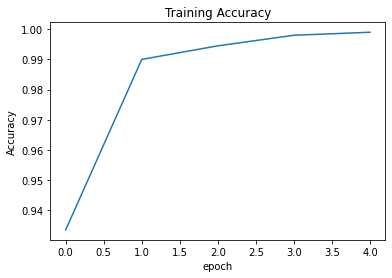

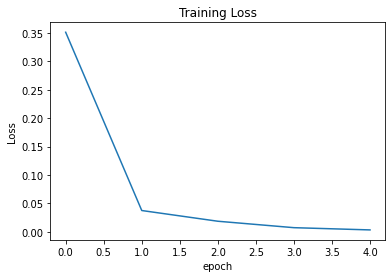

In [16]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.xlabel('epoch')
plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

* We can see from the graphs with Transfer Learning in just one epoch getting nearly %99 accuracy.

#### Lets test the model and see my two pets are really cat?

In [17]:
from tensorflow.keras.preprocessing import image

Sample_Image = image.load_img('ramço.JPG', target_size=(150, 150))

Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

*               we need to convert the image to an array:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


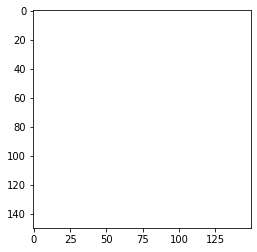

In [18]:
plt.imshow(Sample_Image)   # imshow expects values in the range [0, 1]

* Warning says valid range for imshow with RGB data so I divided my sample image by 255 for the proper range [0..1]

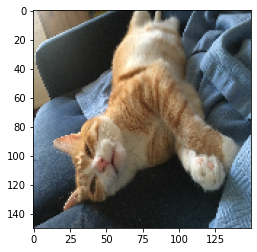

In [19]:
plt.imshow(Sample_Image/255)

In [20]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)

* we need to expand the dimensions and then we can use the model for prediction

In [21]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

Predictions: [[1.0000000e+00 2.2124235e-11]]


* the left number in prediction is for cats and the right number is for dogs. the model predicted as a cat.

In [22]:
Sample_Image = image.load_img('ramçovemumu.JPG', target_size=(150, 150))
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

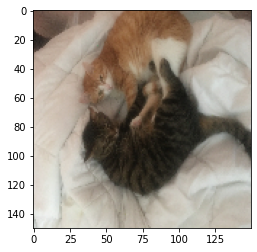

In [23]:
plt.imshow(Sample_Image/255)

In [24]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)

In [25]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

Predictions: [[1.000000e+00 2.396855e-14]]


*  when the model predicting my two cats seems little bit confused but still predicted cat.

In [26]:
Sample_Image = image.load_img('puppy.jpg', target_size=(150, 150))
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

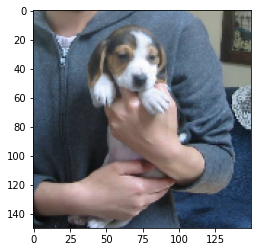

In [27]:
plt.imshow(Sample_Image/255)

In [28]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

Predictions: [[4.177897e-18 1.000000e+00]]


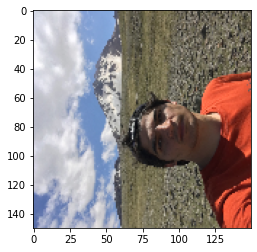

In [29]:
Sample_Image = image.load_img('ben.jpg', target_size=(150, 150))
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
plt.imshow(Sample_Image/255)

In [30]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)

In [31]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)


Predictions: [[1.6681592e-11 1.0000000e+00]]


* I just wondered what the model would predict me. Seems like a dog

#### Conclusion

* Since we transfered knowledge from a network named ResNet50 to ours and didn't have to start from scratch, this means that we can drastically reduce the computational power needed for training. 

* In 5 epochs we got a high degree of accuracy for our model with our new cats and dogs dataset.